# Netflix Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_data=pd.read_csv("netflix.csv")
df_data.shape

(8807, 12)

## Data Cleaning

In [3]:
df_data["cast"]=df_data["cast"].apply(lambda x : str(x).split(','))
df_data["director"]=df_data["director"].apply(lambda x : str(x).split(','))
df_data["country"]=df_data["country"].apply(lambda x : str(x).split(','))

In [4]:
df_data=df_data.explode("cast")
df_data=df_data.explode("director")
df_data=df_data.explode("country")
df_data.shape

(89415, 12)

In [5]:
df_data.loc[df_data["duration"]=='nan']
df_data.loc[5541]=["s5542","Movie","Louis C.K. 2017","Louis C.K.","Louis C.K.","United States","April 4, 2017",2017,"nan","74 min","Movies","Louis C.K. muses on religion, eternal love, gi..."]
df_data.loc[5794]=["s5795","Movie","Louis C.K.: Hilarious","Louis C.K.","Louis C.K.","United States","September 16, 2016",2010,"nan","84 min","Movies","Emmy-winning comedy writer Louis C.K. brings h.."]
df_data.loc[5813]=["s5814","Movie","Louis C.K.: Live at the Comedy Store","Louis C.K.","Louis C.K.","United States","August 15, 2016",2015,"nan","66 min","Movies","The comic puts his trademark hilarious/thought..."]

In [6]:
df_data["duration"]=df_data["duration"].apply(lambda x: int(str(x).split()[0]))
df_data["date_added"]=pd.to_datetime(df_data["date_added"])
df_data["date_added_year"]=df_data["date_added"].dt.year
df_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
1,s2,TV Show,Blood & Water,nan,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
1,s2,TV Show,Blood & Water,nan,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
1,s2,TV Show,Blood & Water,nan,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0


In [7]:
df_data["year_added"]=df_data['date_added'].apply(lambda x: str(x).split(",")[-1].strip())
df_data["year_added"]

0       2021-09-25 00:00:00
1       2021-09-24 00:00:00
1       2021-09-24 00:00:00
1       2021-09-24 00:00:00
1       2021-09-24 00:00:00
               ...         
8806    2019-03-02 00:00:00
8806    2019-03-02 00:00:00
8806    2019-03-02 00:00:00
8806    2019-03-02 00:00:00
8806    2019-03-02 00:00:00
Name: year_added, Length: 89415, dtype: object

In [8]:
df_data.dropna(axis=0,inplace=True)

for i in df_data.columns:
    df_data.drop(df_data[df_data[i] == 'nan'].index, inplace = True,axis=0)
df_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,year_added
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,2021-09-24 00:00:00
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,2021-09-24 00:00:00
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Burkina Faso,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,2021-09-24 00:00:00
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United Kingdom,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,2021-09-24 00:00:00
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Germany,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,2021-09-24 00:00:00


In [9]:
df_clean_data=df_data.copy()

## Data Analysis

In [10]:
df_clean_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,year_added
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,2021-09-24 00:00:00
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,2021-09-24 00:00:00
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Burkina Faso,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,2021-09-24 00:00:00
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United Kingdom,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,2021-09-24 00:00:00
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Germany,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,2021-09-24 00:00:00


## Past 30 yr data for movie

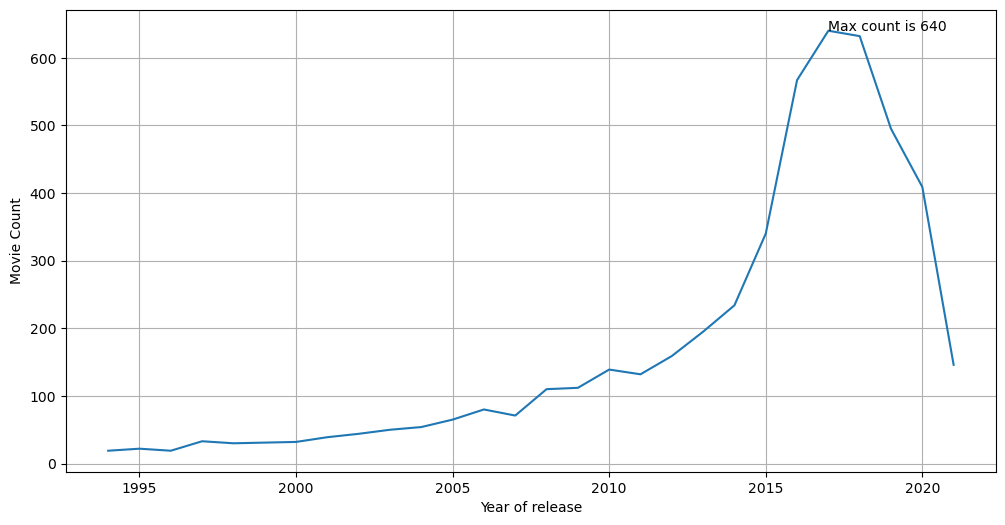

In [11]:
past_30_yr_data=df_clean_data.loc[(df_clean_data["release_year"]>=2024-30)].sort_values("release_year")

past_30_mov_data=past_30_yr_data.loc[(past_30_yr_data["type"]=="Movie")]
v_data=past_30_mov_data.groupby(by=["release_year"])["title"].nunique().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=v_data,x='release_year',y='title')
plt.grid()
plt.xlabel("Year of release")
plt.ylabel("Movie Count")
plt.text(2017,v_data["title"].max(),f'Max count is {v_data["title"].max()}')
plt.show()
#v_data.loc[v_data["title"]==v_data["title"].max()][0]"release_year"]


### The number of movie that were released for the past 30 year had an increasing trend till 2017-18 .Then it stared to decrease.

In [12]:
def func (df):
    df["unicount"]=df["title"].nunique()
    return df
#df_past_30_yr_data=df_clean_data.loc[(df_clean_data["release_year"]>=2024-30)].sort_values("release_year",)
df_compare_m=past_30_yr_data.loc[past_30_yr_data["type"]=='Movie'].groupby(by=["release_year"]).apply(func)
df_compare_t=past_30_yr_data.loc[past_30_yr_data["type"]=='TV Show'].groupby(by=["release_year"]).apply(func)

### Comparison of last 30 yr data

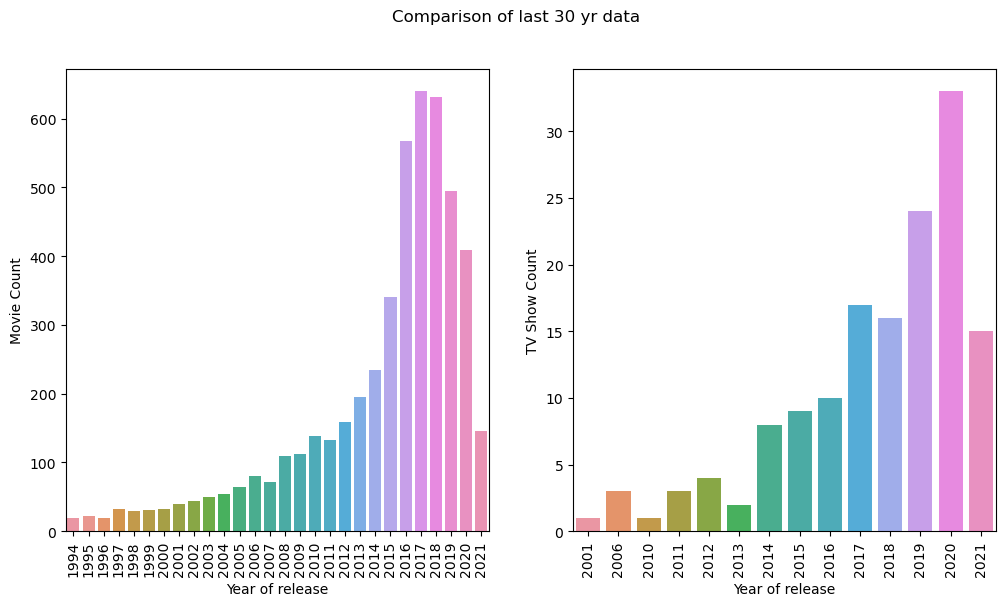

In [13]:
plt.figure(figsize=(12,6))
plt.suptitle("Comparison of last 30 yr data")

plt.subplot(1,2,1)
sns.barplot(data=df_compare_m,x='release_year',y='unicount')
plt.xticks(rotation=90)
plt.xlabel("Year of release")
plt.ylabel("Movie Count")



plt.subplot(1,2,2)
sns.barplot(data=df_compare_t,x='release_year',y='unicount')
plt.xticks(rotation=90)
plt.xlabel("Year of release")
plt.ylabel("TV Show Count")

plt.show()


In [14]:
def uFunc (df):
    df["unicount"]=df["title"].nunique()
    return df
def mtuFunc(df):
    
    df["mtunicount"]=df["title"].nunique()
    return df

df_1=past_30_yr_data.groupby(by=["release_year"]).apply(uFunc)
df_2=df_1.groupby(by=["release_year","type"]).apply(mtuFunc)


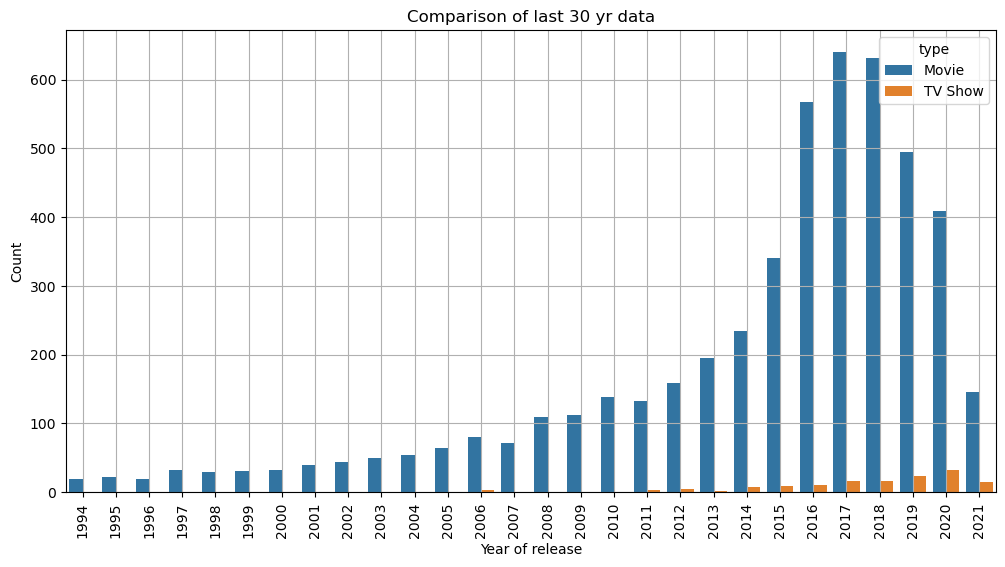

In [15]:
plt.figure(figsize=(12,6))
plt.title("Comparison of last 30 yr data")
sns.barplot(data=df_2,x='release_year',y='mtunicount',hue='type')
plt.xticks(rotation=90)
plt.xlabel("Year of release")
plt.ylabel("Count")
plt.grid()
#plt.text(2017,df_2.loc[df_2["type"]=="Movie"]["mtunicount"].max(),'Mmax')
#plt.text(2020,df_2.loc[df_2["type"]=="TV Show"]["mtunicount"].max(),'Tmax')

### Which actor_director combo have done the most number of movies

In [16]:
past_30_yr_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,year_added
8489,s8490,Movie,The River Wild,Curtis Hanson,John C. Reilly,United States,2018-09-01,1994,PG-13,111,Action & Adventure,A turbulent vacation turns deadly when a fugit...,2018.0,2018-09-01 00:00:00
8304,s8305,Movie,The Flintstones,Brian Levant,Sam Raimi,United States,2019-10-01,1994,PG,91,"Children & Family Movies, Comedies",The Flintstones hit the big screen in this liv...,2019.0,2019-10-01 00:00:00
8304,s8305,Movie,The Flintstones,Brian Levant,Harvey Korman,United States,2019-10-01,1994,PG,91,"Children & Family Movies, Comedies",The Flintstones hit the big screen in this liv...,2019.0,2019-10-01 00:00:00
2361,s2362,Movie,The Emigrant,Youssef Chahine,Yousra,Egypt,2020-06-19,1994,TV-14,130,"Dramas, International Movies",Ram leaves the nomadic life and embarks on a q...,2020.0,2020-06-19 00:00:00
2361,s2362,Movie,The Emigrant,Youssef Chahine,Hanan Turk,France,2020-06-19,1994,TV-14,130,"Dramas, International Movies",Ram leaves the nomadic life and embarks on a q...,2020.0,2020-06-19 00:00:00


In [17]:
df_dir_act_m=past_30_yr_data.loc[past_30_yr_data["type"]=='Movie'].groupby(by=["director","cast"])["title"].nunique().reset_index().sort_values("title",ascending=False)
df_dir_act_t=past_30_yr_data.loc[past_30_yr_data["type"]=='TV Show'].groupby(by=["director","cast"])["title"].nunique().reset_index().sort_values("title",ascending=False)

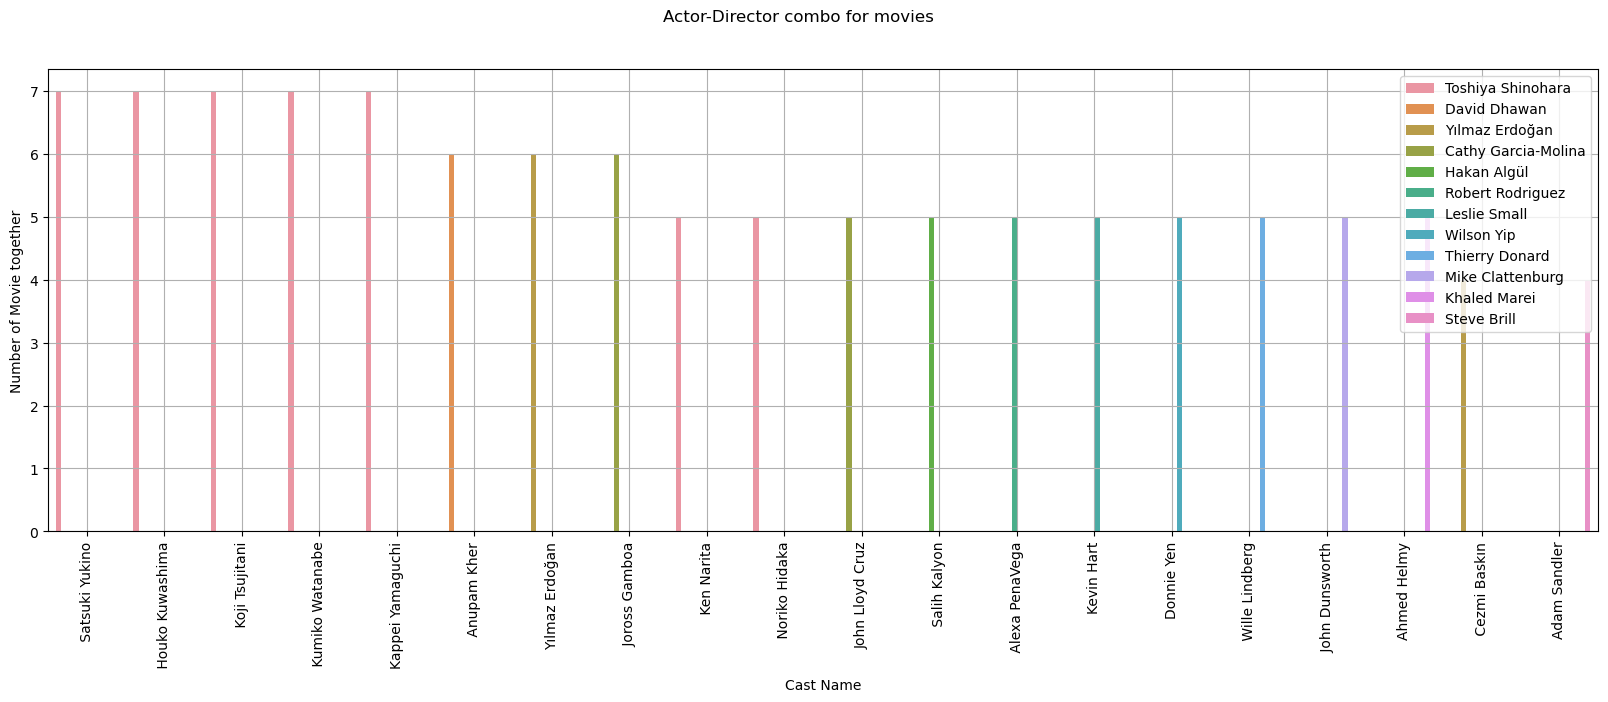

In [18]:
plt.figure(figsize=(20,6))
plt.suptitle("Actor-Director combo for movies")
sns.barplot(data=df_dir_act_m.head(20),x='cast',y='title',hue='director')
plt.xticks(rotation=90)
plt.xlabel("Cast Name")
plt.ylabel("Number of Movie together")
plt.legend(loc="upper right")
plt.grid()

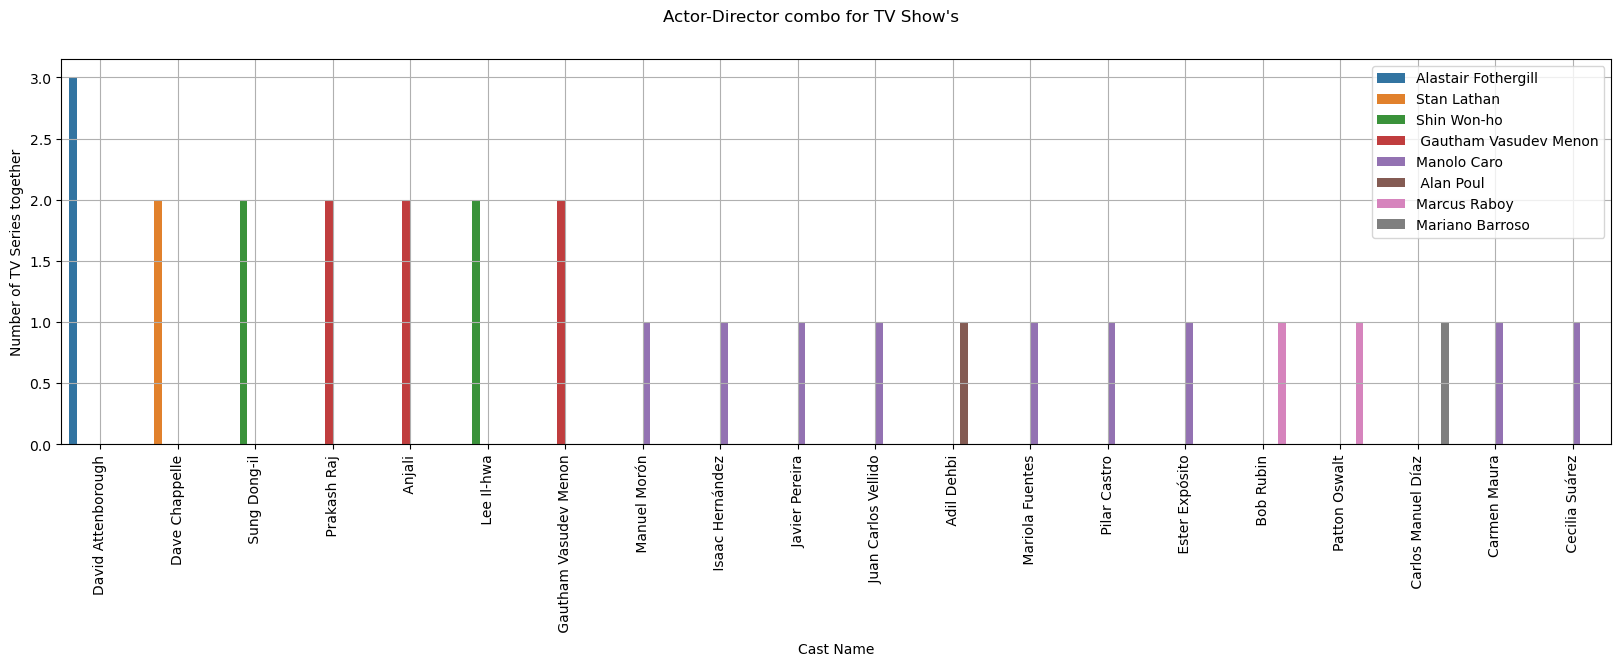

In [19]:
plt.figure(figsize=(20,5))
plt.suptitle("Actor-Director combo for TV Show's")
sns.barplot(data=df_dir_act_t.head(20),x='cast',y='title',hue='director')
plt.xticks(rotation=90)
plt.xlabel("Cast Name")
plt.ylabel("Number of TV Series together")
plt.legend(loc="upper right")
plt.grid()

### Top 40 country that has produced the max number of movies and tv last 30 yr

In [20]:
past_30_yr_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,year_added
8489,s8490,Movie,The River Wild,Curtis Hanson,John C. Reilly,United States,2018-09-01,1994,PG-13,111,Action & Adventure,A turbulent vacation turns deadly when a fugit...,2018.0,2018-09-01 00:00:00
8304,s8305,Movie,The Flintstones,Brian Levant,Sam Raimi,United States,2019-10-01,1994,PG,91,"Children & Family Movies, Comedies",The Flintstones hit the big screen in this liv...,2019.0,2019-10-01 00:00:00
8304,s8305,Movie,The Flintstones,Brian Levant,Harvey Korman,United States,2019-10-01,1994,PG,91,"Children & Family Movies, Comedies",The Flintstones hit the big screen in this liv...,2019.0,2019-10-01 00:00:00
2361,s2362,Movie,The Emigrant,Youssef Chahine,Yousra,Egypt,2020-06-19,1994,TV-14,130,"Dramas, International Movies",Ram leaves the nomadic life and embarks on a q...,2020.0,2020-06-19 00:00:00
2361,s2362,Movie,The Emigrant,Youssef Chahine,Hanan Turk,France,2020-06-19,1994,TV-14,130,"Dramas, International Movies",Ram leaves the nomadic life and embarks on a q...,2020.0,2020-06-19 00:00:00


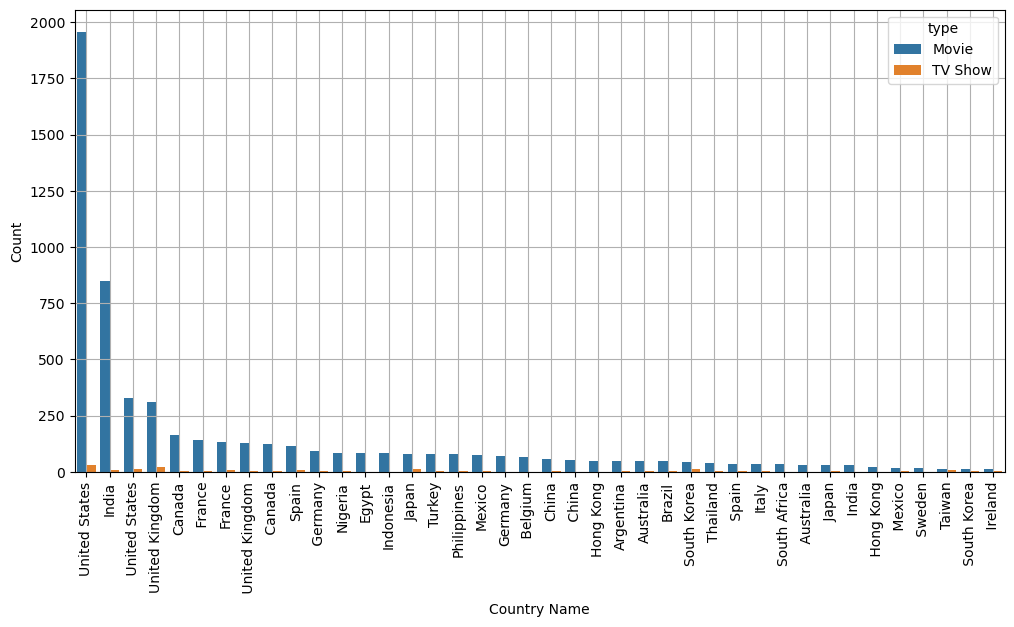

In [21]:
df_1=past_30_yr_data.groupby(by=["country"]).apply(uFunc).reset_index()
df_2=df_1.groupby(by=["country","type"]).apply(mtuFunc).reset_index().sort_values("mtunicount",ascending=False)

top_n_country=df_2["country"].value_counts().index[:40]
df_2_1=df_2.loc[df_2["country"].isin(top_n_country)]

plt.figure(figsize=(12,6))
sns.barplot(data=df_2_1.head(60000),x='country',y='mtunicount',hue='type')
plt.xticks(rotation=90)
plt.xlabel("Country Name")
plt.ylabel("Count")
plt.grid()

### which genre combination TV Show and Movie is more

In [22]:

df_1_g=past_30_yr_data.groupby(by=["listed_in"]).apply(uFunc).reset_index()
df_2_g=df_1_g.groupby(by=["listed_in","type"]).apply(mtuFunc).reset_index().sort_values("mtunicount",ascending=False)

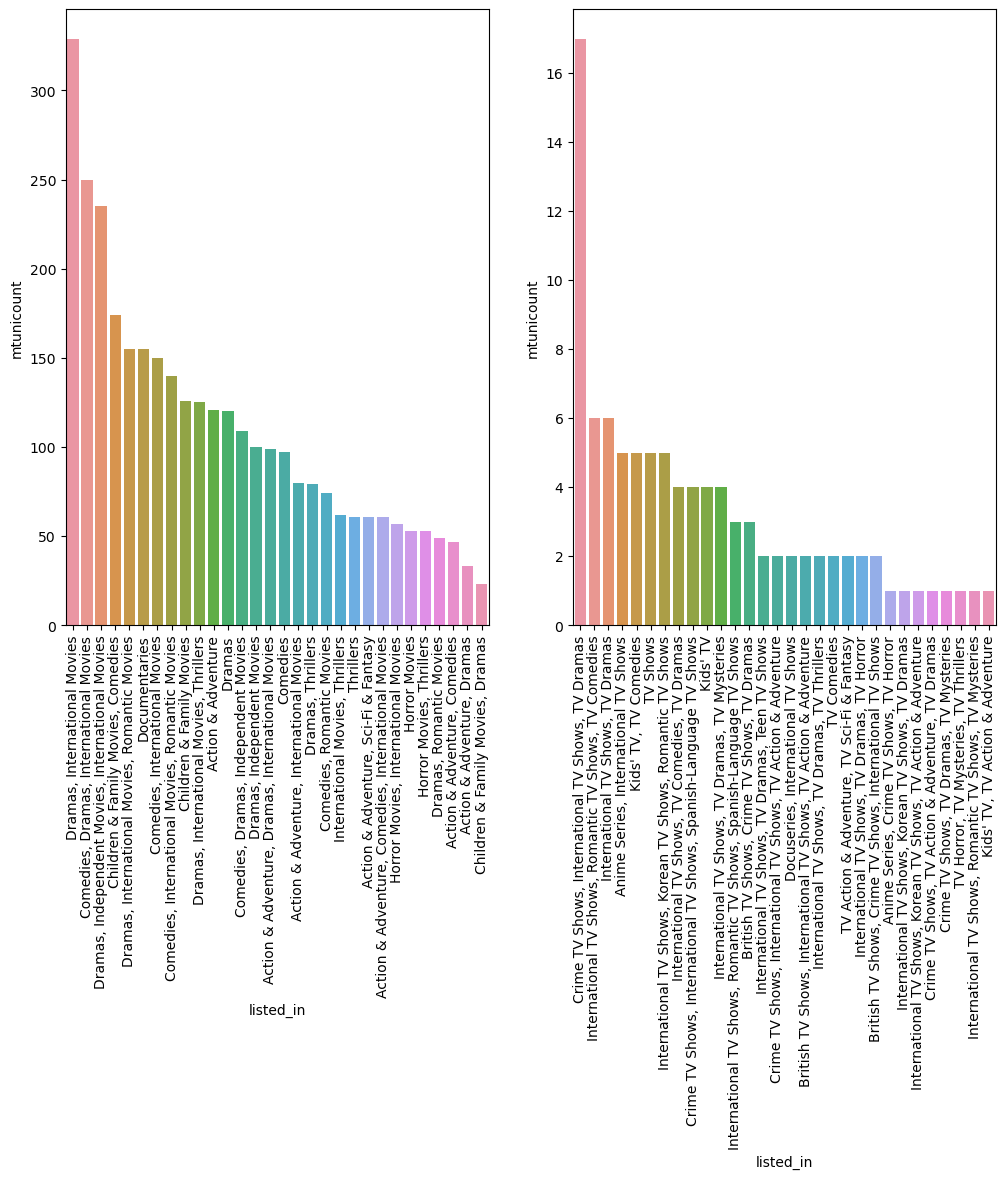

In [23]:
top_n_genre_m=df_2_g.loc[df_2['type']=='Movie']["listed_in"].value_counts().index[:30]
top_n_genre_t=df_2_g.loc[df_2['type']=='TV Show']["listed_in"].value_counts().index[:30]

df_2_top_genre_m=df_2_g.loc[(df_2["listed_in"].isin(top_n_genre_m))&(df_2['type']=="Movie")]
df_2_top_genre_t=df_2_g.loc[(df_2["listed_in"].isin(top_n_genre_t))&(df_2['type']=="TV Show")]
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.barplot(data=df_2_top_genre_m,x='listed_in',y='mtunicount')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=df_2_top_genre_t,x='listed_in',y='mtunicount')
plt.xticks(rotation=90)

plt.show()


### AVG Duration of tv shows and movies over 30 yr

In [24]:
past_30_yr_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,year_added
8489,s8490,Movie,The River Wild,Curtis Hanson,John C. Reilly,United States,2018-09-01,1994,PG-13,111,Action & Adventure,A turbulent vacation turns deadly when a fugit...,2018.0,2018-09-01 00:00:00
8304,s8305,Movie,The Flintstones,Brian Levant,Sam Raimi,United States,2019-10-01,1994,PG,91,"Children & Family Movies, Comedies",The Flintstones hit the big screen in this liv...,2019.0,2019-10-01 00:00:00
8304,s8305,Movie,The Flintstones,Brian Levant,Harvey Korman,United States,2019-10-01,1994,PG,91,"Children & Family Movies, Comedies",The Flintstones hit the big screen in this liv...,2019.0,2019-10-01 00:00:00
2361,s2362,Movie,The Emigrant,Youssef Chahine,Yousra,Egypt,2020-06-19,1994,TV-14,130,"Dramas, International Movies",Ram leaves the nomadic life and embarks on a q...,2020.0,2020-06-19 00:00:00
2361,s2362,Movie,The Emigrant,Youssef Chahine,Hanan Turk,France,2020-06-19,1994,TV-14,130,"Dramas, International Movies",Ram leaves the nomadic life and embarks on a q...,2020.0,2020-06-19 00:00:00


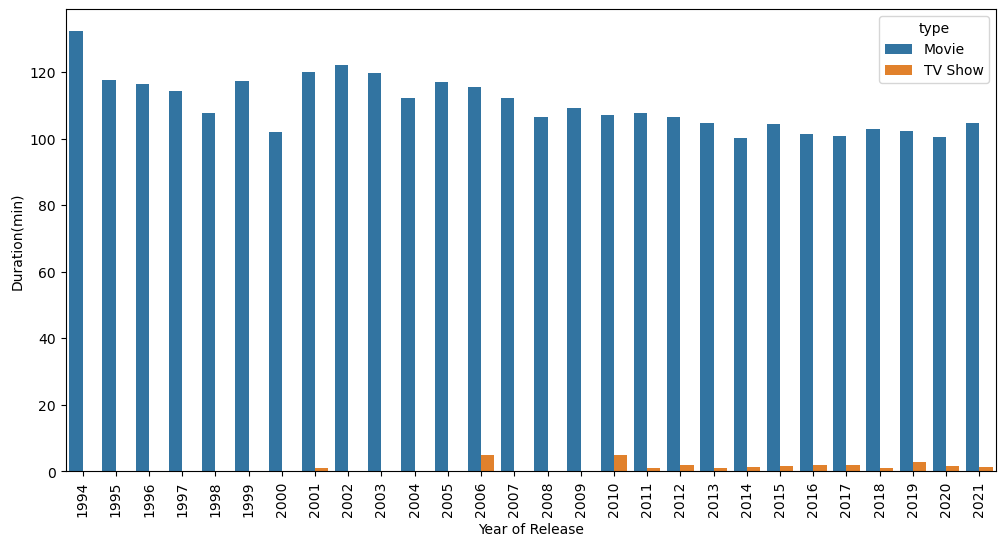

In [25]:
avg_dur_yr=past_30_yr_data.groupby(by=["release_year","type"]).aggregate(avg_mov_tv_time=("duration","mean")).reset_index()
avg_dur_yr


plt.figure(figsize=(12,6))
sns.barplot(data=avg_dur_yr,x='release_year',y='avg_mov_tv_time',hue='type')
plt.xlabel("Year of Release")
plt.ylabel("Duration(min)")
plt.xticks(rotation=90)
plt.show()

In [26]:
past_30_mov_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,year_added
8489,s8490,Movie,The River Wild,Curtis Hanson,John C. Reilly,United States,2018-09-01,1994,PG-13,111,Action & Adventure,A turbulent vacation turns deadly when a fugit...,2018.0,2018-09-01 00:00:00
8304,s8305,Movie,The Flintstones,Brian Levant,Sam Raimi,United States,2019-10-01,1994,PG,91,"Children & Family Movies, Comedies",The Flintstones hit the big screen in this liv...,2019.0,2019-10-01 00:00:00
8304,s8305,Movie,The Flintstones,Brian Levant,Harvey Korman,United States,2019-10-01,1994,PG,91,"Children & Family Movies, Comedies",The Flintstones hit the big screen in this liv...,2019.0,2019-10-01 00:00:00
2361,s2362,Movie,The Emigrant,Youssef Chahine,Yousra,Egypt,2020-06-19,1994,TV-14,130,"Dramas, International Movies",Ram leaves the nomadic life and embarks on a q...,2020.0,2020-06-19 00:00:00
2361,s2362,Movie,The Emigrant,Youssef Chahine,Hanan Turk,France,2020-06-19,1994,TV-14,130,"Dramas, International Movies",Ram leaves the nomadic life and embarks on a q...,2020.0,2020-06-19 00:00:00


### What is the rating of tv/movie in each country

In [27]:
rating_country_data=past_30_mov_data.groupby(by=["country","rating"]).aggregate(rating_count=("title","nunique")).reset_index()

In [28]:
rating_country_data=rating_country_data.sort_values(["rating_count"],ascending=False)
rating_country_data

,country,rating,rating_count
613,United States,TV-MA,532
435,India,TV-14,489
610,United States,R,489
609,United States,PG-13,334
437,India,TV-MA,221
...,...,...,...
250,South Korea,PG-13,1
246,South Africa,TV-14,1
242,Slovakia,TV-MA,1
238,Serbia,TV-MA,1


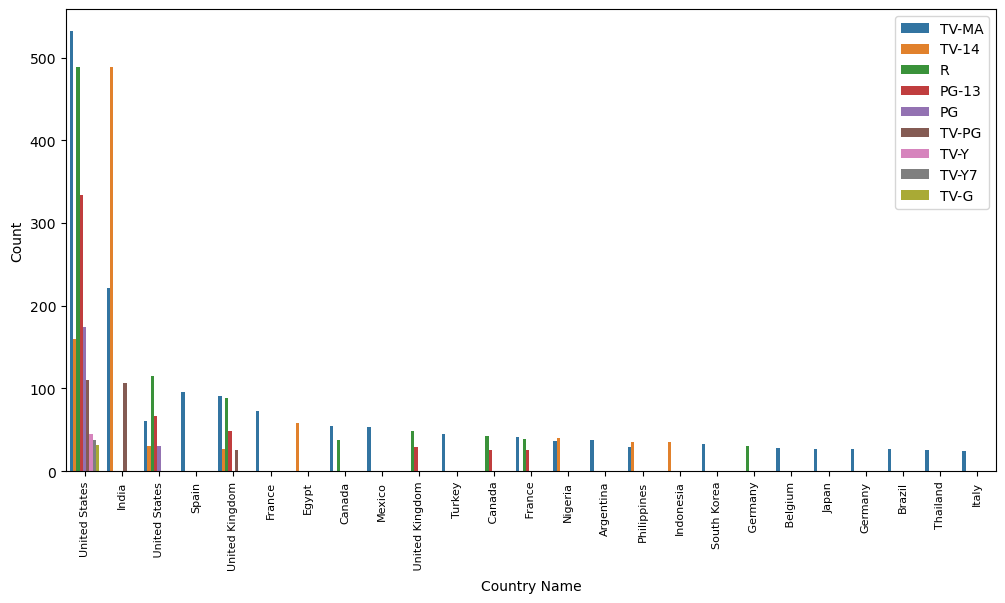

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(data=rating_country_data.head(50),x='country',y='rating_count',hue='rating')
plt.xticks(rotation=90,fontsize=8)
plt.xlabel("Country Name")
plt.ylabel("Count")
plt.legend(loc="upper right")
plt.show()
#plt.grid()

### Which genre movies are more

In [30]:
genre_country_data=past_30_mov_data.groupby(by=["listed_in"]).aggregate(genre_count=("title","nunique")).reset_index()
genre_country_data=genre_country_data.sort_values(["genre_count"],ascending=False)
genre_country_data

,listed_in,genre_count
175,"Dramas, International Movies",329
231,Stand-Up Comedy,274
106,"Comedies, Dramas, International Movies",250
168,"Dramas, Independent Movies, International Movies",235
63,"Children & Family Movies, Comedies",174
...,...,...
98,"Comedies, Cult Movies, LGBTQ Movies",1
99,"Comedies, Cult Movies, Music & Musicals",1
8,"Action & Adventure, Children & Family Movies, ...",1
100,"Comedies, Cult Movies, Sci-Fi & Fantasy",1


Text(0, 0.5, 'Count')

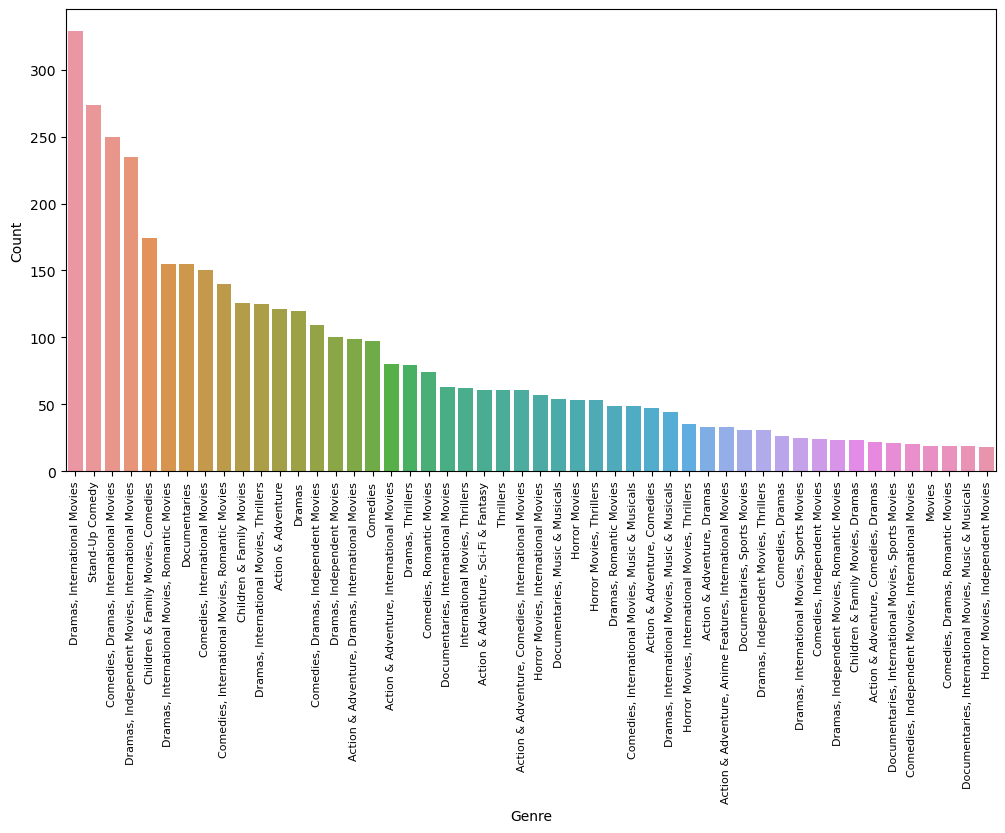

In [31]:

plt.figure(figsize=(12,6))
sns.barplot(data=genre_country_data.head(50),x='listed_in',y='genre_count')
plt.xticks(rotation=90,fontsize=8)
plt.xlabel("Genre")
plt.ylabel("Count")


### Top genres in which USA and India create movies

In [32]:
USA_IND_data=past_30_mov_data.loc[past_30_mov_data["country"].isin(["United States","India"])]
genre_country_data=USA_IND_data.groupby(by=["country","listed_in"]).aggregate(genre_count=("title","nunique")).reset_index()
genre_country_data=genre_country_data.sort_values(["genre_count"],ascending=False)
genre_country_data

,country,listed_in,genre_count
214,United States,Stand-Up Comedy,194
21,India,"Comedies, Dramas, International Movies",119
36,India,"Dramas, International Movies",118
153,United States,Documentaries,117
91,United States,"Children & Family Movies, Comedies",115
...,...,...,...
95,United States,"Children & Family Movies, Comedies, LGBTQ Movies",1
94,United States,"Children & Family Movies, Comedies, Faith & Sp...",1
92,United States,"Children & Family Movies, Comedies, Cult Movies",1
88,United States,"Action & Adventure, Sports Movies",1


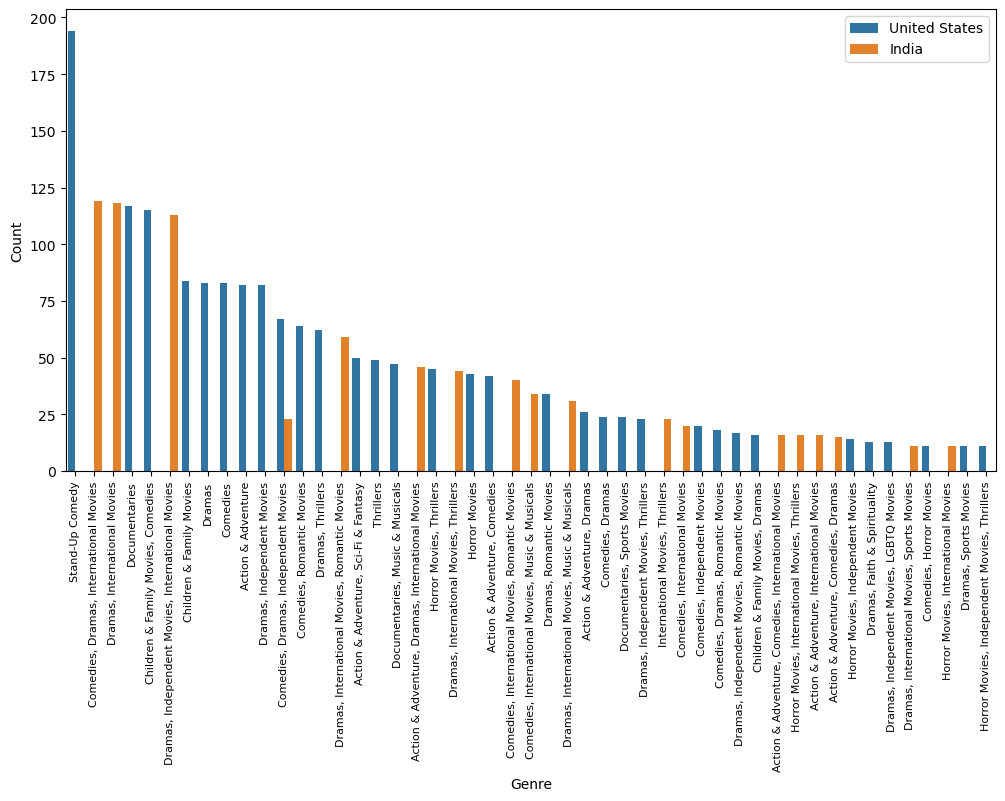

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(data=genre_country_data.head(50),y='genre_count',x='listed_in',hue='country')
plt.xticks(rotation=90,fontsize=8)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.legend(loc="upper right")
plt.show()

### On which year was the most movies/tv series were added to Netflix

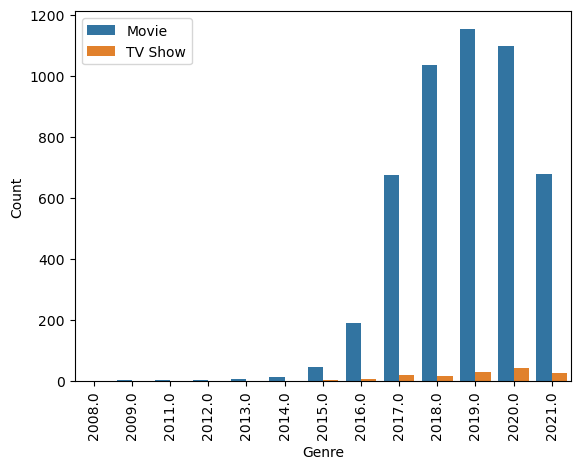

In [34]:
mov_yer=past_30_yr_data.groupby(by=["date_added_year","type"]).aggregate(count_mov_tv=("title","nunique")).reset_index()
sns.barplot(data=mov_yer,x='date_added_year',y='count_mov_tv',hue='type')
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.legend(loc="upper left")
plt.show()